# Global AI Hub Veri Analizi Bootcamp![Data Analysis](https://img.freepik.com/free-vector/data-analysis-concept-illustration_114360-8053.jpg?semt=ais_hybrid)



# 0.Veri Setinin Hazırlanması
**Veri Seti ve Adresi :**
Medical Students Dataset https://www.kaggle.com/datasets/slmsshk/medical-students-dataset

In [2]:
# Kullanacagımız kütüphaneleri yukleyelim.
import numpy as np # cok boyutlu diziler, matrislerde matematiksel işlevler, fonksiyonlar icin
import pandas as pd # veri analizi icin

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt #pyplot modülü:çizgi,çubuk,pasta,histogramlar vb
import seaborn as sns #Isı haritaları, renkli dagilimlar vb

In [3]:
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/medical-students-dataset/medical_students_dataset.csv")
df = df_.copy() #dataframi df degiskenine atalım,verileri df ile analiz edecegiz.

In [4]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.02) #%2 oranında eksik veri gelsin istedim

# 1.Veriye İlk Bakış

In [5]:
# Veri setinin ilk 7 gözlemini görelim.
df.head(n = 7)  # parametre vermezsek default olarak 5 deger getirir.

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,7.0,21.0,NaN,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No


In [6]:
df.shape # satır ve sütun sayısını verir.Bizde 200k satır ve 13 sütun var.
print(f"Veri seti içerisinde toplam {len(df)} satır,{len(df.columns)} sütun vardır.\n")

Veri seti içerisinde toplam 200000 satır,13 sütun vardır.



info() metodunu kullanarak, veri setine ait yapısal bilgilere ulaşabiliriz.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      176417 non-null  float64
 1   Age             176395 non-null  float64
 2   Gender          176524 non-null  object 
 3   Height          176383 non-null  float64
 4   Weight          176484 non-null  float64
 5   Blood Type      176469 non-null  object 
 6   BMI             176334 non-null  float64
 7   Temperature     176425 non-null  float64
 8   Heart Rate      176594 non-null  float64
 9   Blood Pressure  176400 non-null  float64
 10  Cholesterol     176272 non-null  float64
 11  Diabetes        176492 non-null  object 
 12  Smoking         176437 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [8]:
print(f"dataframe,'{type(df.columns)}' tipinde veri döndürmektedir.\n")

dataframe,'<class 'pandas.core.indexes.base.Index'>' tipinde veri döndürmektedir.



**!!** pandas.core.indexes.base.Index sınıfı, pandas veri yapılarındaki satır ve sütun etiketlerinin yönetilmesinde kritik bir rol oynar ve veri manipülasyonları için birçok önemli fonksiyon sunar.

In [9]:
if df.index.is_unique:
    print("İndeks benzersizdir.")
else:
    print("İndeks benzersiz değil.")

İndeks benzersizdir.


In [10]:
duplicate_indices = df.index[df.index.duplicated()]
print("Tekrar eden indeksler:")
print(duplicate_indices)

Tekrar eden indeksler:
Index([], dtype='int64')


Yukarıdaki kodda da göründüğü üzere her indeks uniquedir.

In [11]:
df.dtypes #değişkenler ve değişken tiplerini bu şekilde görebiliriz.

Student ID        float64
Age               float64
Gender             object
Height            float64
Weight            float64
Blood Type         object
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Diabetes           object
Smoking            object
dtype: object

In [12]:
# Kategorik ve sayısal sütunları ayıran list comprehension 
categorical_features = [col for col in df.columns if (df[col].dtype == "object") or isinstance(df[col].dtype, pd.CategoricalDtype)]
numerical_features = [col for col in df.columns if not ((df[col].dtype == "object") or isinstance(df[col].dtype, pd.CategoricalDtype))]

# Kategorik ve sayısal sütunları yazdırma
print("Kategorik Özellikler = ", categorical_features)
print("Numerik Özellikler = ", numerical_features)



Kategorik Özellikler =  ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
Numerik Özellikler =  ['Student ID', 'Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']


Veri tipi Object olan kategorik değişkenlerin veri tipini Categorical olarak değiştirelim.

In [13]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Student ID      176417 non-null  float64 
 1   Age             176395 non-null  float64 
 2   Gender          176524 non-null  category
 3   Height          176383 non-null  float64 
 4   Weight          176484 non-null  float64 
 5   Blood Type      176469 non-null  category
 6   BMI             176334 non-null  float64 
 7   Temperature     176425 non-null  float64 
 8   Heart Rate      176594 non-null  float64 
 9   Blood Pressure  176400 non-null  float64 
 10  Cholesterol     176272 non-null  float64 
 11  Diabetes        176492 non-null  category
 12  Smoking         176437 non-null  category
dtypes: category(4), float64(9)
memory usage: 14.5 MB


In [15]:
df['Blood Type'][3:7] # 3 ile 7 arasındaki satırların kan gruplarını verir 


3     B
4     O
5     B
6    AB
Name: Blood Type, dtype: category
Categories (4, object): ['A', 'AB', 'B', 'O']

Ayrıca 4 farklı kan grubu olduğunu görebiliriz.

describe() fonksiyonu, Pandas DataFrame veya Series'deki sayısal sütunlar için temel istatistiksel özet bilgilerini (ortalama, standart sapma, min, max, çeyrekler vb.) sağlar.

In [16]:
df.describe().T #t eklentisi df'nin satırlarını ve sütunlarını yer değiştirir.

,count,mean,std,min,25%,50%,75%,max
Student ID,176417.0,49982.857525,28877.545841,1.000000,24986.000000,49958.000000,74995.000000,100000.000000
Age,176395.0,26.021180,4.890044,18.000000,22.000000,26.000000,30.000000,34.000000
Height,176383.0,174.955978,14.447500,150.000041,162.489948,174.911901,187.474647,199.998639
Weight,176484.0,69.974949,17.323017,40.000578,54.978746,69.981719,84.992884,99.999907
BMI,176334.0,23.339865,7.033710,10.074837,17.858160,22.671410,28.001247,44.355113
Temperature,176425.0,98.600900,0.500296,96.397835,98.264836,98.599511,98.940236,100.824857
Heart Rate,176594.0,79.503788,11.541436,60.000000,70.000000,80.000000,90.000000,99.000000
Blood Pressure,176400.0,114.562341,14.401639,90.000000,102.000000,115.000000,127.000000,139.000000
Cholesterol,176272.0,184.481438,37.561824,120.000000,152.000000,184.000000,217.000000,249.000000


Şimdide 0 kan grubuna sahip sigara kullanmayan listedeki son 4 kadın kaydını listeleyelim. Sadece Student ID,Age,Heart Rate,Blood Pressure,Cholesterol kolonları getirelim

In [35]:
filtered_df = df[(df['Gender'] == 'Female') & (df['Smoking'] == 'No') & (df['Blood Type'] == 'O')]
last_4_records = filtered_df[['Student ID', 'Age','Heart Rate','Blood Pressure','Cholesterol']].tail(4)
print(last_4_records)

        Student ID   Age  Heart Rate  Blood Pressure  Cholesterol
199927     99928.0  28.0        96.0           134.0        162.0
199945     99946.0  31.0        79.0           113.0        184.0
199970     99971.0  31.0         NaN           131.0        220.0
199999    100000.0  20.0        95.0           133.0        132.0


# 2. Eksik Veri Analizi

Veri setindeki eksik değerlerin tespiti ve bu eksikliklerin uygun yöntemlerle giderilmesi veri analizinde oldukça kritik rol oynar. Verinin toplanması veya işlenmesi sırasında oluşan hatalar ya da kayıplar nedeniyle ortaya çıkar. Bu eksiklikler, veri setinin yapısal bütünlüğünü bozarak modelleme ve analiz süreçlerinde yanlış sonuçlara yol açabilir. Bu nedenle eksik verilere nasıl bir işlem yapacağımız kritiktir. İki ana strateji ile eksik verileri yönetebiliriz.
* **Silme :** Eksik verilerin bulunduğu satır veya sütunlar, veri setinden çıkarılabilir. Ancak bu yöntem dikkatli kullanılmalıdır. Büyük veri setlerinde eksik verilerin silinmesi,silinen satır veya sütunlarda yer alan diğer bilgilerin kaybına yol açar.
* **Doldurma :** Bu işlem, eksik verilerin yerine doğru anlamlı ve istatistiksel olarak tutarlı veriler eklemeyi hedefler. Eksik verilerin doldurulması veri setindeki dağılımları maipule edebileceğinden hangi yöntemle eksik verilerin doldurulacağı dikattli bir şekilde seçilmelidir.
1. **Ortalama, Medyan veya Mod ile Doldurma**  
   Özellikle sayısal verilerde bu yöntemlerden biri tercih edilebilir

2. **Regresyon Yöntemleri**  
   Eksik değerlerin ilişkili olduğu diğer değişkenlerden yararlanarak tahmin yar.

3. **KNN Algoritması (En Yakın Komşu)**  
   Eksik verinin bulunduğu satırı, benzer özelliklere sahip en yakın komşularının değeriyle dourur.

4. **Veri İmputasyonu**  
   Eksik verilerin birden fazla tahminle doldurulması işlemidir. Her eksik değer, birkaç farklı tahminle doldurulmasını sağlar ve daha güvenli sonuçlar elde edilmesine yardımcı olur. Birkaç farklı tahminin ortalaması alınarak eksik veri doldurulmuş olur.
rulmuş olur.


### 2.1 Eksik Verilerin Gözlemlenmesi 


Her nesnede kaç eksik veri var sayısını bulalım ve yüzdeklik değerini bulalım.

In [17]:
missing_count = df.isna().sum()  # Eksik değer sayısı
missing_percentage = (missing_count / len(df)) * 100  # Eksik değer yüzdesi

# Sonuçları güzel bir formatta birleştirelim
result = pd.DataFrame({
    'Eksik Veri Adedi': missing_count,
    'Eksik Veri yüzdesi': missing_percentage
})

# Sonuçları yazdıralım
print(result)

                Eksik Veri Adedi  Eksik Veri yüzdesi
Student ID                 23583             11.7915
Age                        23605             11.8025
Gender                     23476             11.7380
Height                     23617             11.8085
Weight                     23516             11.7580
Blood Type                 23531             11.7655
BMI                        23666             11.8330
Temperature                23575             11.7875
Heart Rate                 23406             11.7030
Blood Pressure             23600             11.8000
Cholesterol                23728             11.8640
Diabetes                   23508             11.7540
Smoking                    23563             11.7815


In [18]:
total_missing = missing_count.sum()  # Toplam eksik veri sayısı
average_missing_percentage = missing_percentage.mean()  # Ortalama eksik veri yüzdesi

print(f"\nToplam Eksik Veri Sayısı: {total_missing}")
print(f"Ortalama Eksik Veri Yüzdesi: {average_missing_percentage:.2f}%")


Toplam Eksik Veri Sayısı: 306374
Ortalama Eksik Veri Yüzdesi: 11.78%


**Nan ve Null Farkı** 

None, Python'da bir değerin olmadığını belirtirken, NaN sayısal verilerde eksik veya geçersiz değeri ifade eder. None genelde Python veri yapılarında, NaN ise özellikle NumPy ve Pandas gibi kütüphanelerde sayısal verilerde kullanılır. Bu yüzden yukarıda isnull() yerine isna() fonksiyonunu kullandık.

In [19]:
# Veri setinde toplam kaç adet eksik veri var, kaç adet eksik olmayan veri var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan,{df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 2293626 adet eksik olmayan,306374 eksik gözlem var.


In [20]:
# Veri setinde en az bir verisi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,99995.0,22.0,Male,159.486907,NaN,A,27.631082,98.971976,86.0,134.0,208.0,No,NaN
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No


Hiç eksik verisi olmayan ilk 3 sıradaki kayıtlara bakalım.

In [21]:
 #Tüm satırdaki tüm hücrelerin NaN olmadığını kontrol eder, bu koşula uyan ilk 3 satırı getirir.
df[df.notnull().all(axis = 1)][:3]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
11,12.0,34.0,Female,182.416302,76.371050,AB,22.950992,98.118274,86.0,97.0,247.0,No,No


Missingno kütüphanesi, Python'da veri setlerindeki eksik (NaN) değerlerin görselleştirilmesi ve analizi için kullanılan bir araçtır.

In [36]:
!pip install missingno

In [37]:
!pip show missingno 
#bu kod ile missingno kütüphanesinin sürümünü öğrenmiş olduk,
#böylece yüklendiğini de teyit ettik.

Name: missingno
Version: 0.5.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: MIT License
Location: /opt/conda/lib/python3.10/site-packages
Requires: matplotlib, numpy, scipy, seaborn
Required-by: 


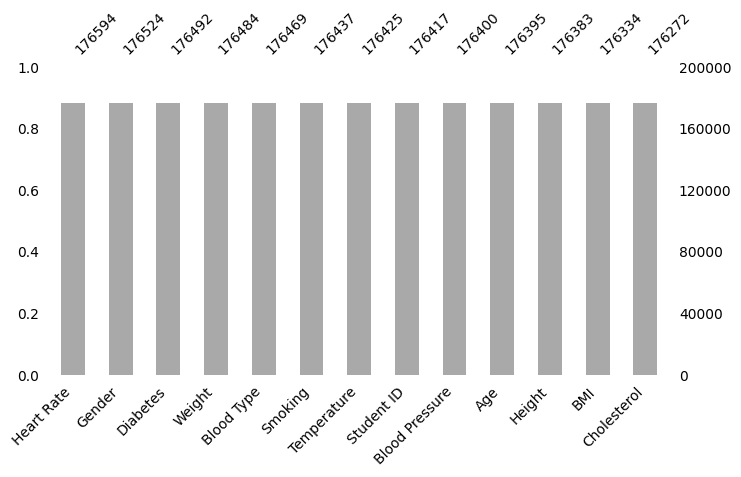

In [48]:
import missingno as msno

msno.bar(df = df,
         sort='descending', # soldan sağa büyükten küçüğe sıralar.
         color='darkgray', # eksik veriler genellikle turkuaz veya koyu gri ile gösterilebilir
         figsize = (8, 4),
         fontsize = 10);

Bu grafik bize 200000 satırlık verimiz olduğu ve her nesnenin ne kadar sayıda(üstte) dolu olduğu ve doluluk oranını 0 ile 1 arasında(solda) gösterir. 

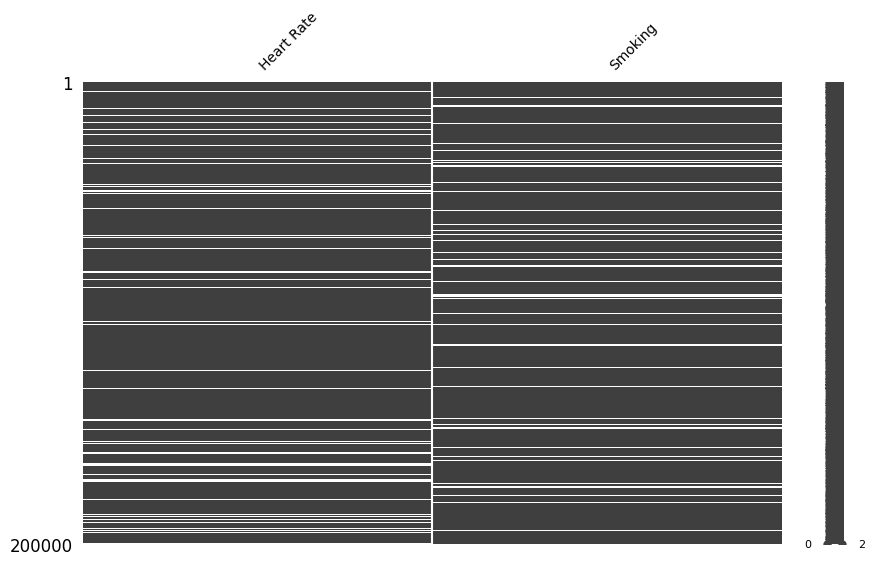

In [50]:
 #msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını 
#görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['Heart Rate', 'Smoking']],
            figsize = (10, 6),
            fontsize = 10);

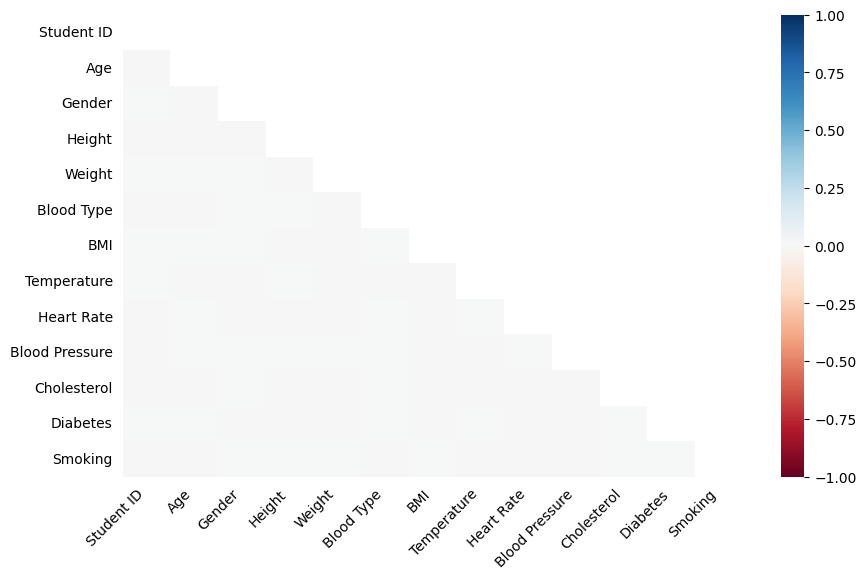

In [51]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0'a ne kadar yakınsa, ilişki ihtimali o kadar düşük.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

### 2.2 Eksik Verilerin Silinmesi

Eksik bir verinin bulunduğu gözlemi silmeye karar vermeden önce, bu eksikliğin doğal bir şekilde ortaya çıkıp çıkmadığını anlamamız önemlidir. Örneğin, elimizdeki bir konut satış veri setinde, bazı evlerin yatak odası sayısı kolonunda eksik değerler olabilir. Bu eksik veriler, konutların garaj gibi özellikleri olmadığı durumlarda doğal bir eksiklik olabilir. Bu durumda, eksik verileri silmek yerine, uygun bir şekilde doldurmak daha doğru bir yaklaşım olabilir.

Eğer veri setinde eksik veriler önemli bir yüzdede yer alıyorsa, eksik verileri silmek veri setindeki birçok gözlemi kaybetmek anlamına gelir. Bu durum, verinin içeriğine dair önemli bilgiler kaybetmemize yol açabilir. Veri setinde olabildiğince fazla veri bulundurmak, hem analitik hem de makine öğrenmesi süreçlerinde çok önemli olduğundan, veri kaybını en aza indirgemek için alternatif yöntemler tercih edilmelidir. Bu bağlamda, eksik veriler üzerinde çeşitli doldurma teknikleri veya tahminleme yöntemleri kullanmak, verinin bütünlüğünü koruyarak analizlerin doğru şekilde yapılmasına olanak tanır.

In [52]:
# Tüm kolonlarda eksik (NaN) değer bulunan satırları silme
df.dropna(how='all')

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [54]:
df.dropna(how='all', inplace=True) # inplace = True ile orjinal  dataframe'inde güncellemiş silelim.

### 2.3 Yöntem 2: Eksik Verilerin Doldurulması
Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [55]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No


In [56]:
df_fillna.isna().sum()

Student ID        23583
Age               23605
Gender            23476
Height            23617
Weight            23516
Blood Type        23531
BMI               23666
Temperature       23575
Heart Rate        23406
Blood Pressure    23600
Cholesterol       23728
Diabetes          23508
Smoking           23563
dtype: int64

#### 2.3.1 Sayısal Değişkenlerin doldurulması

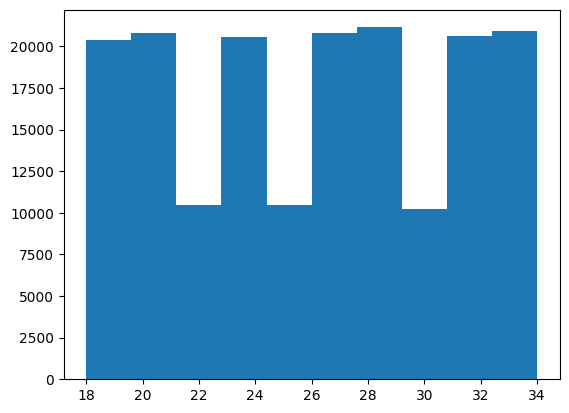

In [57]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['Age'])
plt.show()


In [58]:
df.isnull().sum()

Student ID        23583
Age               23605
Gender            23476
Height            23617
Weight            23516
Blood Type        23531
BMI               23666
Temperature       23575
Heart Rate        23406
Blood Pressure    23600
Cholesterol       23728
Diabetes          23508
Smoking           23563
dtype: int64

In [60]:
# 'age' kolonundaki eksik verileri ortalama ile doldurmak
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df['Age'].isnull().sum())  # Şimdi eksik veri sayısı 0 olmalı

0


In [61]:
 # Döngüyle tüm sayısal değerlerimizi ortalamasıyla doldurduk.
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

/tmp/ipykernel_30/428597042.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(df[col].mean(), inplace = True)


In [62]:
df_fillna.isna().sum()

Student ID        23583
Age                   0
Gender            23476
Height                0
Weight                0
Blood Type        23531
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          23508
Smoking           23563
dtype: int64

#### 2.3.2 Kategorik Değişkenlerin Doldurulması



In [64]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# Blood Type değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Blood Type'].isna().sum()

# Blood Type değişkeninde en çok tekrar eden değeri(mode) alalım.
blood_type_mode = df_fillna['Blood Type'].mode()

# Blood Type değişkenini mode değeri ile dolduralım.
df_fillna['Blood Type'] = df_fillna['Blood Type'].fillna(value = blood_type_mode[0])

# Blood Type değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

Student ID        23583
Age                   0
Gender            23476
Height                0
Weight                0
Blood Type            0
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          23508
Smoking           23563
dtype: int64

In [65]:
df_fillna[["Smoking"]][:20]

,Smoking
0,NaN
1,No
2,No
3,Yes
4,No
5,Yes
6,No
7,No
8,No
9,No


In [68]:
# Önceki değer ile doldurma işlemi
df_fillna["Smoking"].fillna(method = "bfill")

/tmp/ipykernel_30/1812906790.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["Smoking"].fillna(method = "bfill")


0          No
1          No
2          No
3         Yes
4          No
         ... 
199995     No
199996    Yes
199997     No
199998     No
199999     No
Name: Smoking, Length: 200000, dtype: category
Categories (2, object): ['No', 'Yes']

In [71]:
# Kan grubu bazında ortalama kolesterol değerini veren kod.
blood_type_mean_cholesterol_df = df.groupby('Blood Type')['Cholesterol'].mean().to_frame()
print(blood_type_mean_cholesterol_df)

            Cholesterol
Blood Type             
A            184.243237
AB           184.285078
B            184.817644
O            184.569402


/tmp/ipykernel_30/920600568.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blood_type_mean_cholesterol_df = df.groupby('Blood Type')['Cholesterol'].mean().to_frame()


In [73]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

Student ID        23583
Age                   0
Gender            23476
Height            23617
Weight            23516
Blood Type        23531
BMI               23666
Temperature       23575
Heart Rate        23406
Blood Pressure    23600
Cholesterol       23728
Diabetes          23508
Smoking           23563
dtype: int64

In [74]:
df_categorical_fillna["Cholesterol"].fillna(
    value = df_categorical_fillna.groupby("Blood Type")["Cholesterol"].transform("mean"),
    inplace = True
)
# kan grubuna göre kolesterol verisinde boş olanları doldurur.

/tmp/ipykernel_30/4016614628.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value = df_categorical_fillna.groupby("Blood Type")["Cholesterol"].transform("mean"),
/tmp/ipykernel_30/4016614628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical_fillna["Cholesterol"].fillna(


In [75]:
df_categorical_fillna.isna().sum()

Student ID        23583
Age                   0
Gender            23476
Height            23617
Weight            23516
Blood Type        23531
BMI               23666
Temperature       23575
Heart Rate        23406
Blood Pressure    23600
Cholesterol        2845
Diabetes          23508
Smoking           23563
dtype: int64

In [77]:
df_categorical_fillna[df_categorical_fillna[["Blood Type","Cholesterol"]].isna().all(axis=1)][["Blood Type","Cholesterol"]]

,Blood Type,Cholesterol
28,NaN,NaN
187,NaN,NaN
197,NaN,NaN
218,NaN,NaN
510,NaN,NaN
...,...,...
199662,NaN,NaN
199706,NaN,NaN
199732,NaN,NaN
199801,NaN,NaN


In [78]:
df_categorical_fillna[df_categorical_fillna['Cholesterol'].isnull()]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
28,29.0,26.02118,NaN,NaN,82.826786,NaN,32.276465,NaN,60.0,93.0,NaN,No,NaN
187,188.0,30.00000,Female,168.951822,76.081122,NaN,NaN,99.175419,98.0,NaN,NaN,No,Yes
197,198.0,25.00000,Male,NaN,47.488177,NaN,NaN,98.966556,NaN,138.0,NaN,No,NaN
218,219.0,24.00000,Female,174.166385,51.687614,NaN,NaN,99.246372,81.0,90.0,NaN,Yes,No
510,511.0,34.00000,Male,175.270366,62.183138,NaN,20.242104,99.389833,94.0,108.0,NaN,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199662,NaN,19.00000,Male,186.065877,NaN,NaN,19.615518,99.329142,83.0,137.0,NaN,No,No
199706,99707.0,18.00000,Male,162.004873,NaN,NaN,NaN,98.940023,93.0,100.0,NaN,No,No
199732,99733.0,30.00000,Male,162.253404,83.619473,NaN,31.762874,99.241745,66.0,126.0,NaN,No,No
199801,NaN,33.00000,Female,196.144911,81.020067,NaN,21.059037,98.442219,84.0,132.0,NaN,NaN,No


# 3.Kategorik Veri Analizi

In [79]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [80]:
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Gender,Blood Type,Diabetes,Smoking
0,Female,O,No,NaN
1,Male,B,No,No
2,Female,A,Yes,No


In [82]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["Blood Type"].unique()

array(['O', 'B', 'A', 'AB', nan], dtype=object)

In [83]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 2 unique values in "Gender" categorical feature.

There are 4 unique values in "Blood Type" categorical feature.

There are 2 unique values in "Diabetes" categorical feature.

There are 2 unique values in "Smoking" categorical feature.



In [84]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

Gender
Male      90005
Female    89995
Name: count, dtype: int64
 *********************************************
Blood Type
B     45537
O     45511
AB    44486
A     44466
Name: count, dtype: int64
 *********************************************
Diabetes
No     161986
Yes     18014
Name: count, dtype: int64
 *********************************************
Smoking
No     143971
Yes     36029
Name: count, dtype: int64
 *********************************************


In [85]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["Gender"].unique().tolist()[::-1]
comp_categories

[nan, 'Male', 'Female']

In [86]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


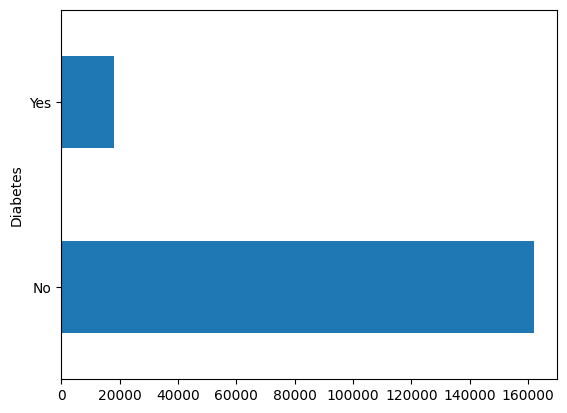

In [87]:
df['Diabetes'].value_counts().plot.barh();

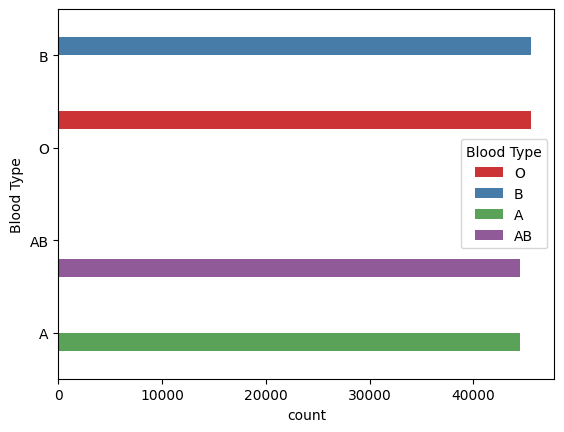

In [88]:
sns.countplot(data = df,
              y = "Blood Type",
              hue = "Blood Type",
              order = df["Blood Type"].value_counts().index,
              palette = "Set1");

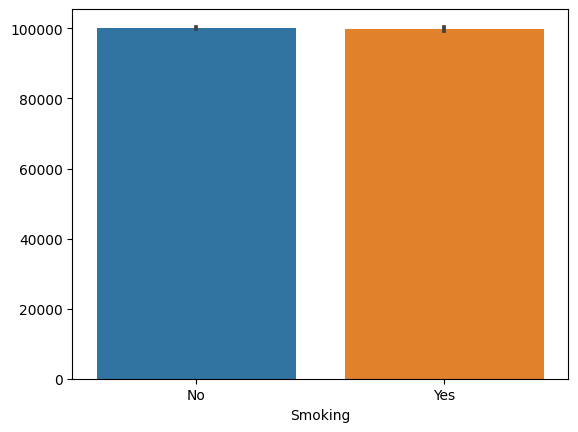

In [90]:
sns.barplot(data = df, x = "Smoking", y = df.Smoking.index);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


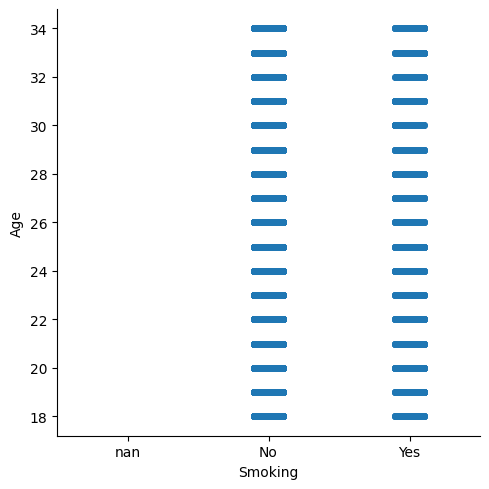

In [91]:
sns.catplot(data = df,
            x = "Smoking",
            y = "Age");

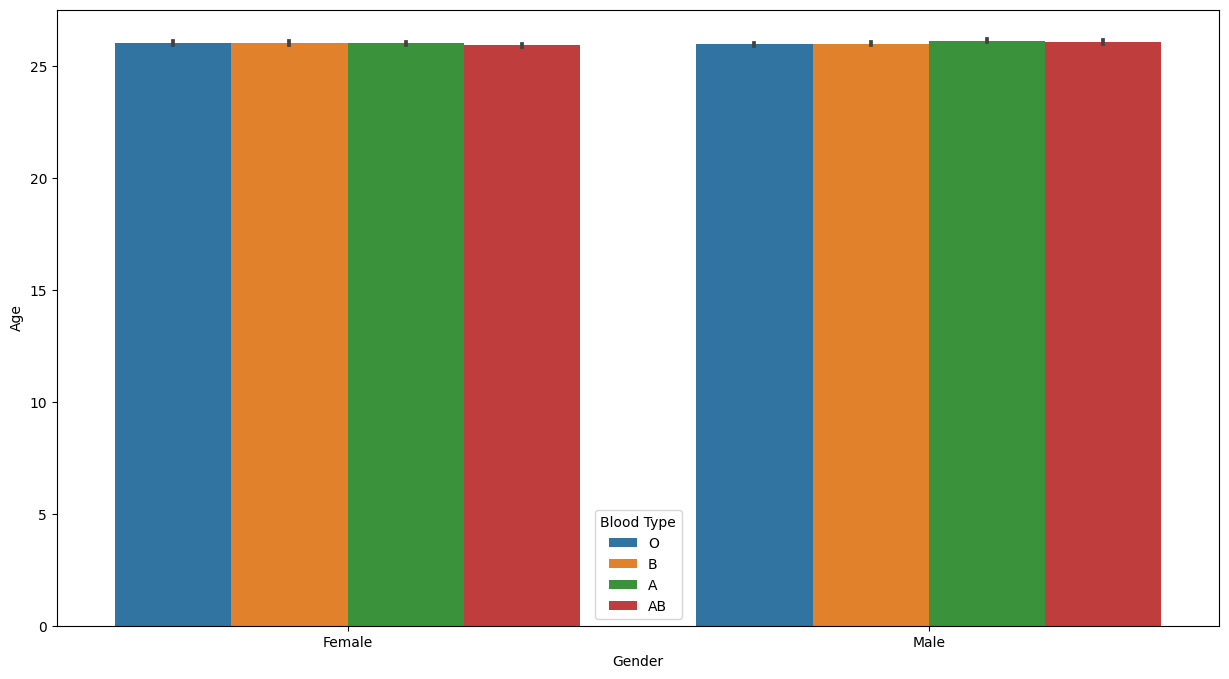

In [93]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "Gender",
            y = "Age",
            hue = "Blood Type");

Soru: Yaşa göre ortalama en çok Kalp Atış Hızı elde eden iş kategorisi hangisi?

In [94]:
df_heart_rate = df.groupby(by = "Age","Gender")["Heart Rate"].mean().to_frame().reset_index().sort_values(by = "Heart Rate", ascending = False)

df_heart_rate


,Age,Heart Rate
5,23.0,79.746932
14,32.0,79.644606
12,30.0,79.633959
8,26.0,79.623762
16,34.0,79.598523
11,29.0,79.574546
0,18.0,79.549057
13,31.0,79.543947
15,33.0,79.522941
1,19.0,79.451437


In [97]:
df_heart_rate = df.groupby(by = ["Age", "Gender"])["Heart Rate"].mean().to_frame().reset_index().sort_values(by = "Heart Rate", ascending = False)[:5]

df_heart_rate


,Age,Gender,Heart Rate
24,30.0,Female,79.884301
10,23.0,Female,79.860609
16,26.0,Female,79.856367
31,33.0,Male,79.811927
0,18.0,Female,79.747373


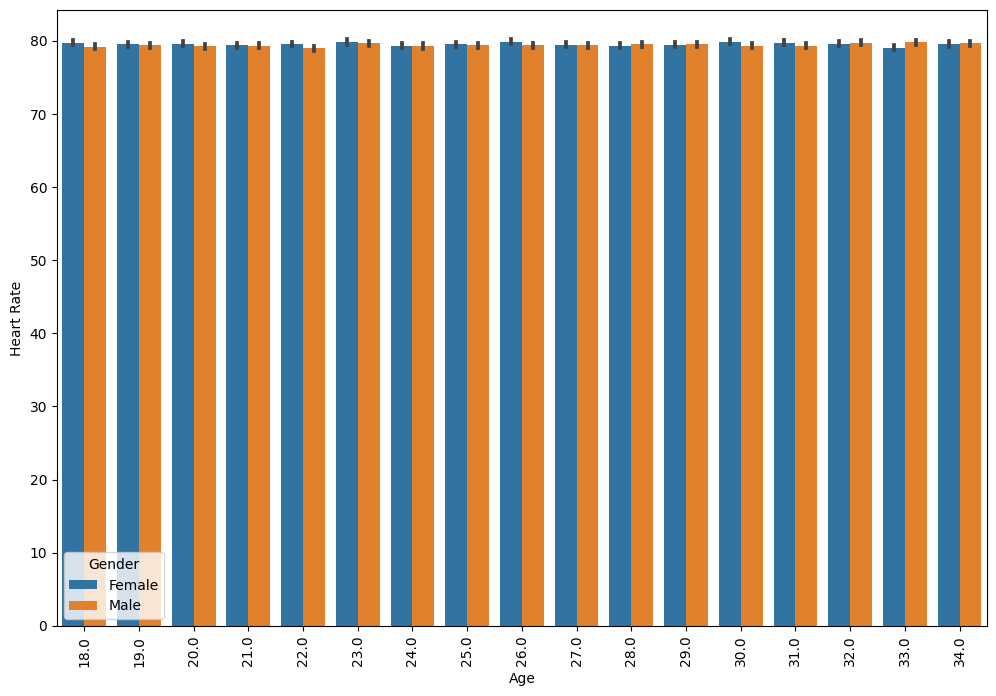

In [98]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "Age", y = "Heart Rate", hue = "Gender");

In [100]:
df_female_smoking = df.groupby(by = "Gender")["Smoking"].value_counts().to_frame().reset_index()

# 'value_counts' sonucunda, sayma işlemi 'count' adıyla bir kolon oluşturur
df_female_smoking = df_female_smoking.rename(columns={0: "count"}) 

# Female cinsiyeti için filtreleme
df_female_smoking = df_female_smoking[df_female_smoking['Gender'] == "Female"]

df_female_smoking


,Gender,Smoking,count
0,Female,No,64872
1,Female,Yes,16095


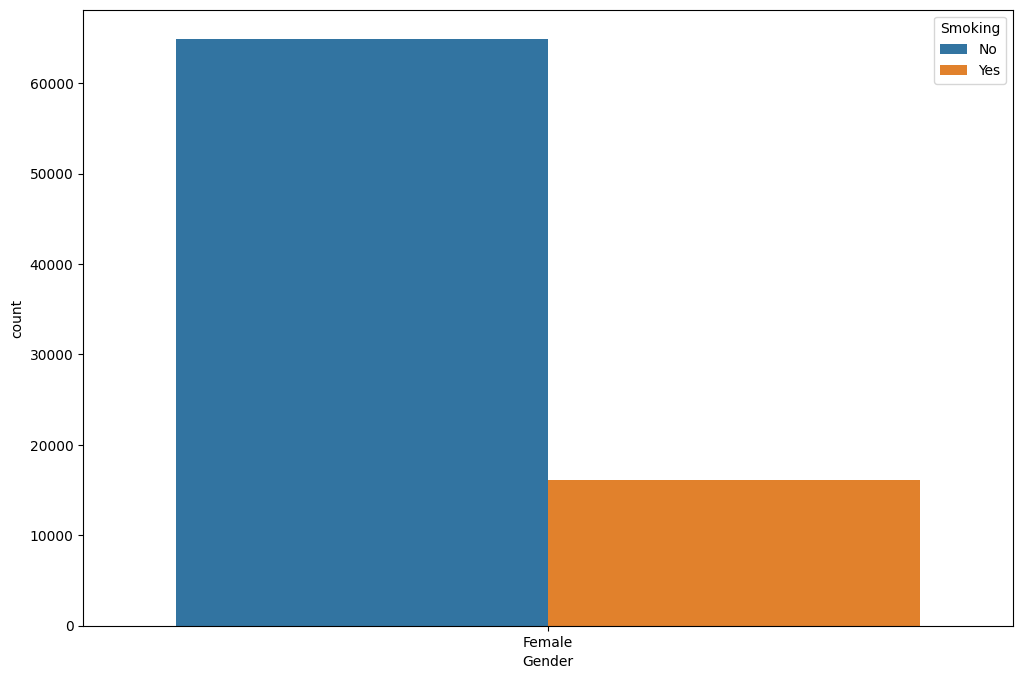

In [101]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df_female_smoking, x = "Gender", y = 'count', hue = "Smoking");

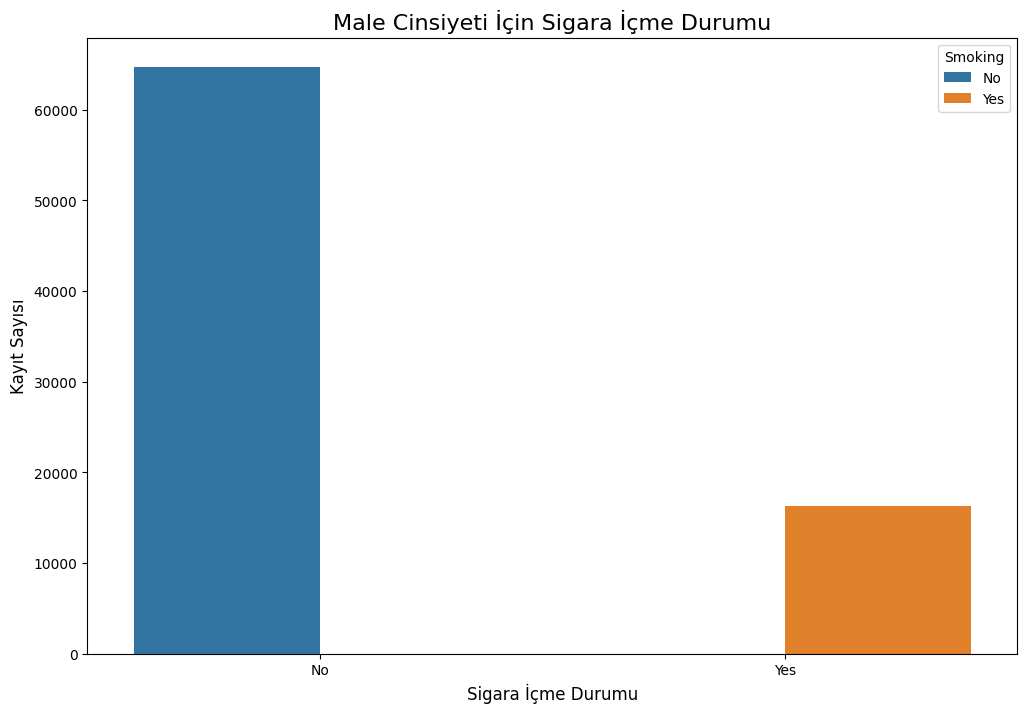

In [103]:
def plot_smoking_by_gender(df, gender):
    """
    Bu fonksiyon, verilen cinsiyet için sigara içme durumu (Yes/No) sayımlarını yaparak bir bar grafiği oluşturur.
    
    Args:
    df (DataFrame): İşlem yapılacak veri seti.
    gender (str): Sigara içme durumu verilerini gruplamak için kullanılan cinsiyet değeri.
    
    Returns:
    None
    """
    # Veriyi cinsiyet ve sigara içme durumuna göre gruplama ve sayma
    df_gender_smoking = df.groupby(by = "Gender")["Smoking"].value_counts().to_frame().reset_index()

    # 'value_counts' sonucunda sayma işlemi 'count' adıyla bir kolon oluşturur
    df_gender_smoking = df_gender_smoking.rename(columns={0: "count"})

    # İstenilen cinsiyeti filtreleme
    df_gender_smoking_filtered = df_gender_smoking[df_gender_smoking['Gender'] == gender]

    # Bar grafiği oluşturma
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_gender_smoking_filtered, x="Smoking", y="count", hue="Smoking")
    plt.title(f"{gender} Cinsiyeti İçin Sigara İçme Durumu", fontsize=16)
    plt.xlabel("Sigara İçme Durumu", fontsize=12)
    plt.ylabel("Kayıt Sayısı", fontsize=12)
    plt.show()

# Örnek kullanım
plot_smoking_by_gender(df, "Male")

# 4. Sürekli Değişken Analizi

In [104]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
0,1.0,18.0,161.777924,72.354947,27.645835,NaN,95.0,109.0,203.0
1,2.0,NaN,152.069157,47.630941,NaN,98.714977,93.0,104.0,163.0
2,3.0,32.0,182.537664,55.741083,16.729017,98.260293,76.0,130.0,216.0
3,NaN,30.0,182.112867,63.332207,19.096042,98.839605,99.0,112.0,141.0
4,5.0,23.0,NaN,46.234173,NaN,98.480008,95.0,NaN,231.0


In [106]:
def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [107]:
give_stats(dataframe = df)

**********Student ID**********
Mean value of Student ID is 49974.04
Std value of Student ID is 28879.64
Max value of Student ID is 100000.0
Min value of Student ID is 1.0
Count value of Student ID is 180000
Median value of Student ID is 49943.5

**********Age**********
Mean value of Age is 26.02
Std value of Age is 4.89
Max value of Age is 34.0
Min value of Age is 18.0
Count value of Age is 180000
Median value of Age is 26.0

**********Height**********
Mean value of Height is 174.95
Std value of Height is 14.45
Max value of Height is 199.9986386856763
Min value of Height is 150.00004139318173
Count value of Height is 180000
Median value of Height is 174.8999141442403

**********Weight**********
Mean value of Weight is 69.97
Std value of Weight is 17.32
Max value of Weight is 99.99990661273384
Min value of Weight is 40.00057777326063
Count value of Weight is 180000
Median value of Weight is 69.9793837798508

**********BMI**********
Mean value of BMI is 23.34
Std value of BMI is 7.03
Max

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

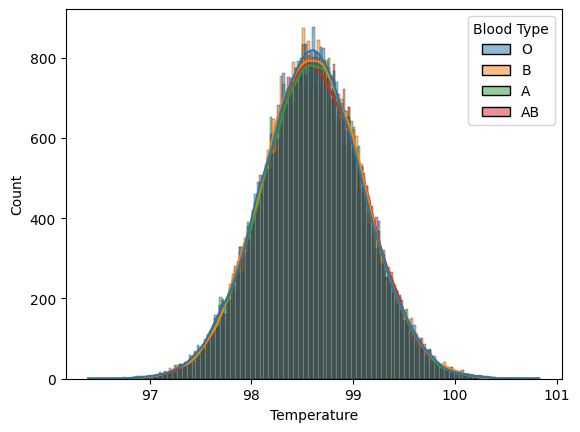

In [109]:
sns.histplot(data = df, x = "Temperature", kde = True, hue = "Blood Type");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


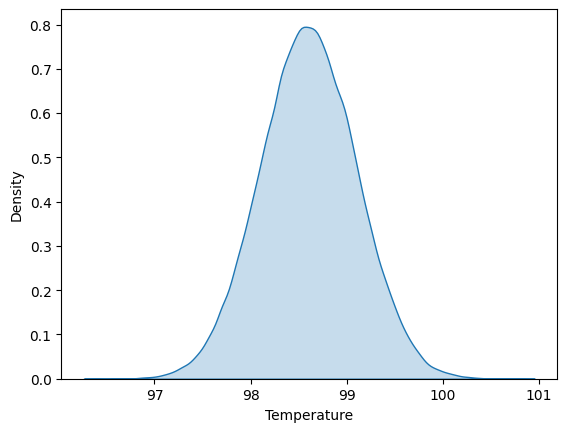

In [110]:
sns.kdeplot(df['Temperature'], fill = True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

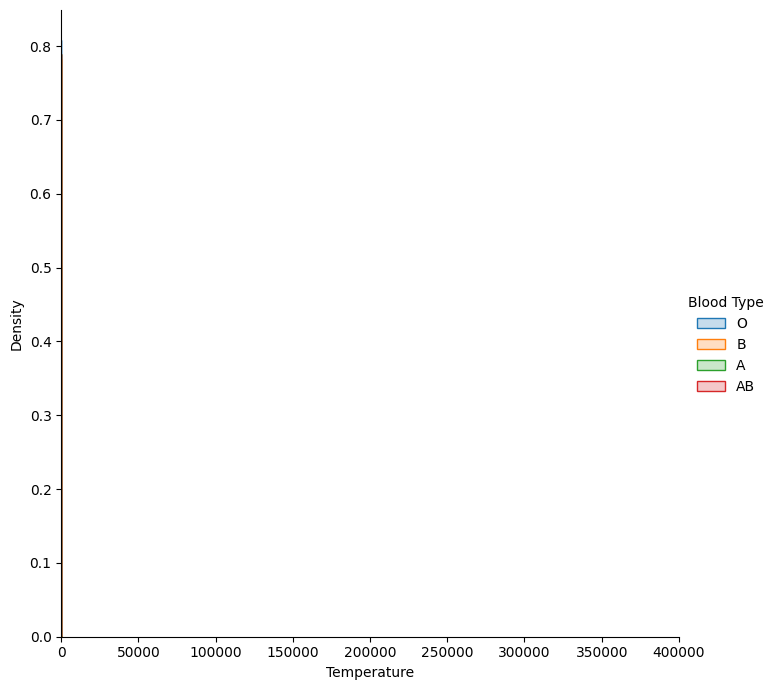

In [112]:
sns.FacetGrid(data = df,
              hue = "Blood Type",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "Temperature", fill = True).add_legend();

In [113]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())  # Ortalama ile doldur
# eksik veriler var ise kdeplot çalışmamaktadır.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


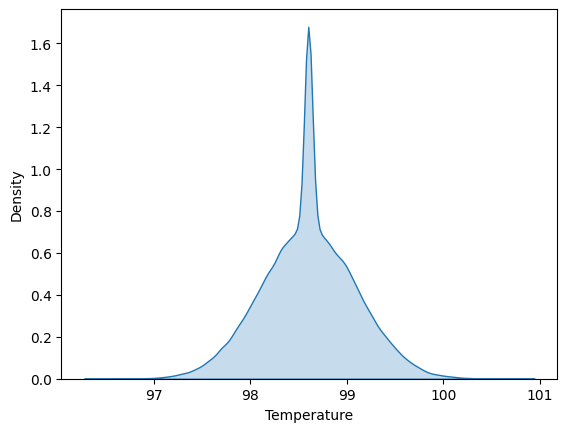

In [114]:
sns.kdeplot(df['Temperature'], fill = True);


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


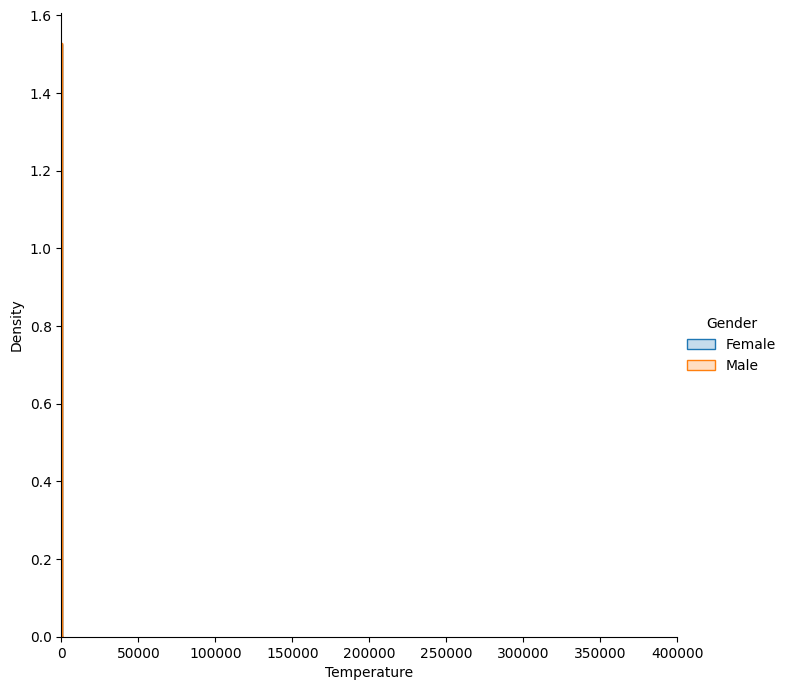

In [115]:
sns.FacetGrid(data = df,
              hue = "Gender",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "Temperature", fill = True).add_legend();

In [116]:
df['Temperature'].describe()  # Veri aralığını kontrol edelim


count    200000.000000
mean         98.600948
std           0.474844
min          96.397835
25%          98.306875
50%          98.600948
75%          98.897102
max         100.824857
Name: Temperature, dtype: float64

(96.39783549516254, 100.82485716582524)

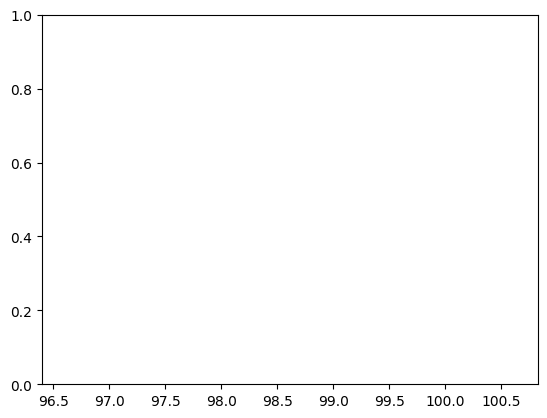

In [117]:
plt.xlim(df['Temperature'].min(), df['Temperature'].max())  # Otomatik olarak uygun xlim değerini ayarla


In [118]:
# Cinsiyet kolonundaki eksik verileri en yaygın (mod) değer ile doldurma
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


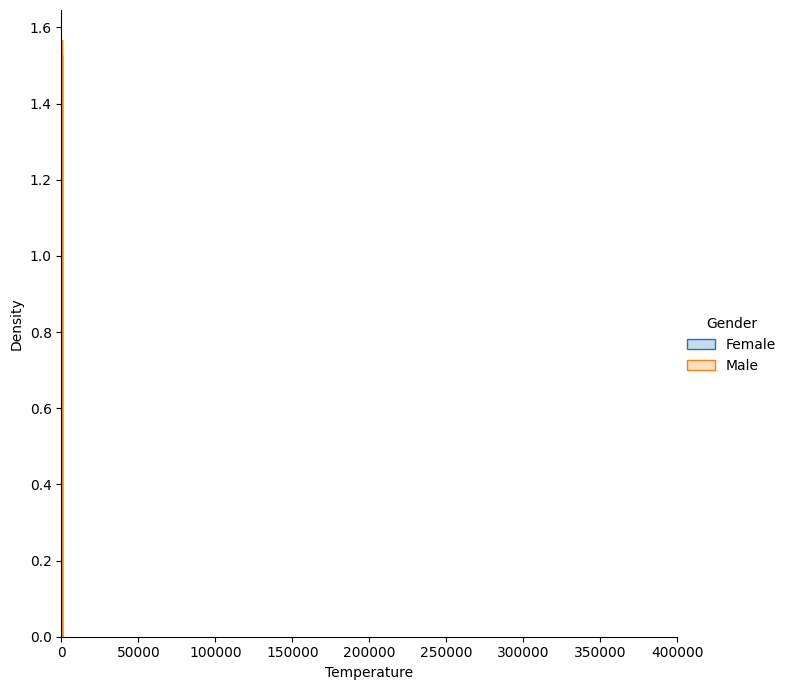

In [119]:
sns.FacetGrid(data = df,
              hue = "Gender",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "Temperature", fill = True).add_legend();

In [120]:
print(df['Temperature'].isna().sum())

0


In [121]:
print(df['Gender'].isna().sum())

0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


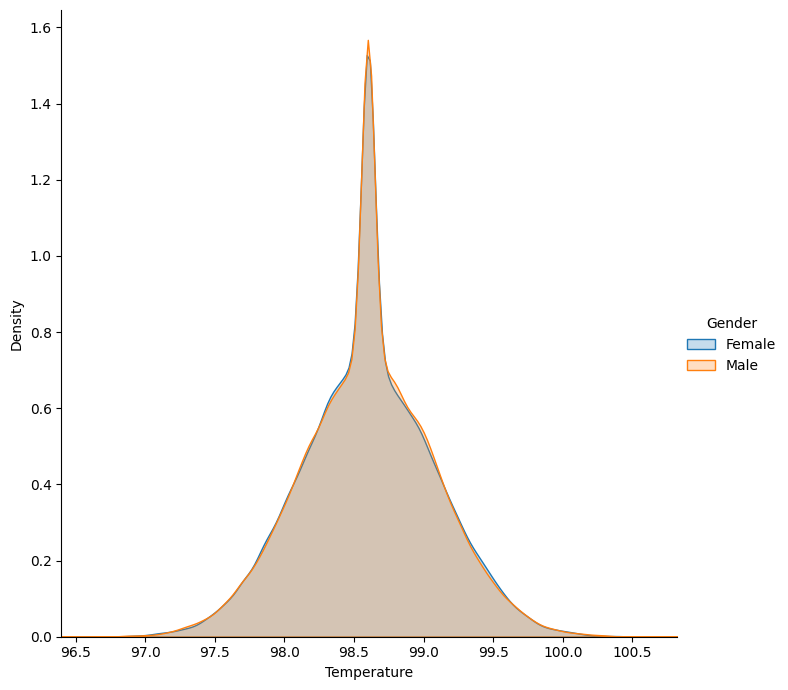

In [122]:
sns.FacetGrid(data=df, hue="Gender", height=7, 
              xlim=(df['Temperature'].min(), df['Temperature'].max())) \ # Uygun xlim değeriyle dolduralım.
    .map(sns.kdeplot, "Temperature", fill=True) \
    .add_legend()

plt.show()

<Figure size 1200x800 with 0 Axes>

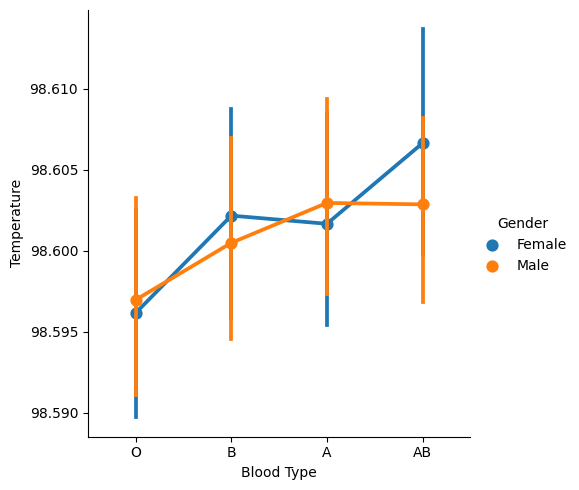

In [123]:
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "Blood Type", y = "Temperature", hue = "Gender", kind = "point");

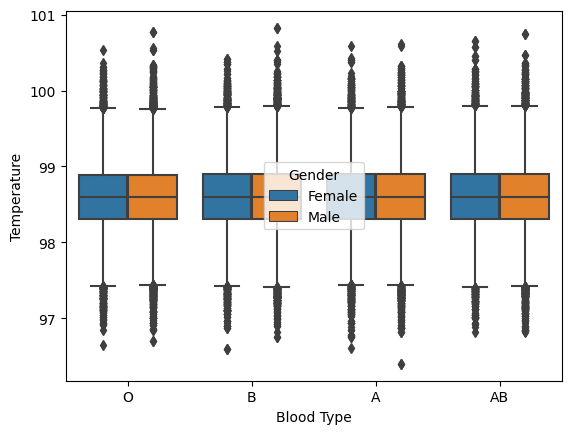

In [127]:
sns.boxplot(data = df,
            x = "Blood Type",
            y = "Temperature",
            hue = "Gender");

# 5. Aykırı Değer Analizi (Outliers)


In [128]:
df = df_.copy()

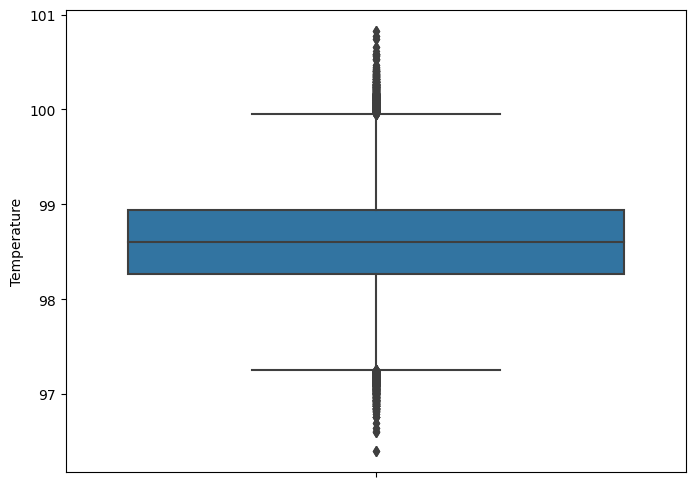

In [133]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["Temperature"],
            orient = "v");

In [134]:
df_Temperature = df['Temperature']
df_Temperature

0               NaN
1         98.714977
2         98.260293
3         98.839605
4         98.480008
            ...    
199995    99.170685
199996    97.865785
199997    98.768210
199998    98.994212
199999    98.595817
Name: Temperature, Length: 200000, dtype: float64

In [135]:
# Quantile değerlerin belirlenmesi.
Q1 = df_Temperature.quantile(0.25)
Q3 = df_Temperature.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

98.26474978652914
98.94054257907942
0.6757927925502827


In [136]:
outlier_idx = df_Temperature[df_salary_in_usd > upper_fence].index

outlier_idx

Index([   365,    438,    446,    509,    943,   1372,   2667,   2712,   3089,
         3600,
       ...
       196916, 197036, 197181, 197373, 197725, 199088, 199311, 199504, 199796,
       199879],
      dtype='int64', length=684)

In [137]:
df_Temperature[df_salary_in_usd > upper_fence]

365       100.354844
438       100.257651
446       100.213579
509       100.159141
943       100.080324
             ...    
199088     99.960758
199311     99.956814
199504    100.587479
199796     99.957041
199879     99.975920
Name: Temperature, Length: 684, dtype: float64

In [139]:
# Aykırı değerleri silelim.
df_del = df[~(df_Temperature > upper_fence)]

df_del

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


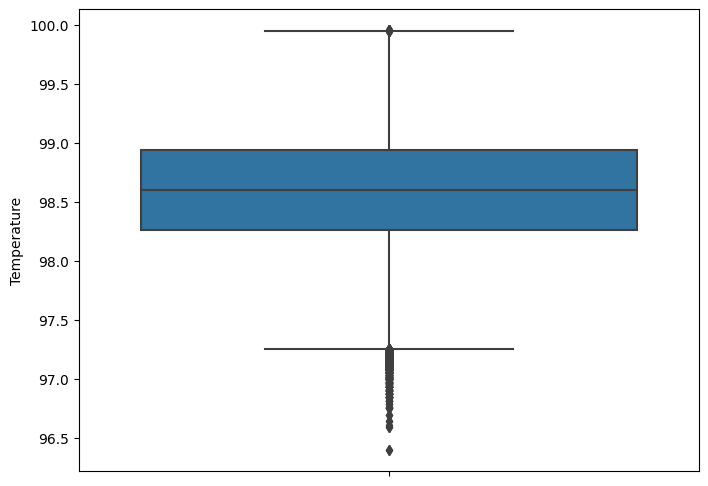

In [141]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["Temperature"],
            orient = "v");

## 5.1 Aykırı Gözlemlerin Doldurulması
### 5.1.1 Ortalama ile doldurma

In [143]:
df.loc[df_Temperature > upper_fence, "Temperature"] = df_Temperature.mean()

In [144]:
df.loc[df_Temperature > upper_fence, "Temperature"]

Series([], Name: Temperature, dtype: float64)

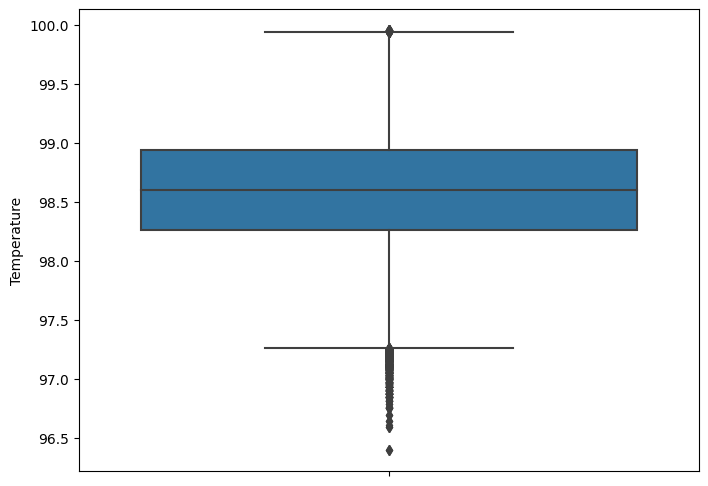

In [145]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["Temperature"],
            orient = "v");

# 6. Feature Engineering


In [146]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [148]:
def obesity_control(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 24.9:
        return 'Normal'
    elif 25 <= BMI < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['obesity_control'] = df['BMI'].apply(obesity_control)

df.head(3)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking,obesity_control
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN,Overweight
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No,Obese
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No,Underweight


In [150]:
def check_adult(smoking, age):
    if smoking == 'Yes' and age >= 18:
        return 'Adult'
    elif smoking == 'Yes' and age < 18:
        return 'Minor'
    else:
        return 'Non-smoker'

# Yeni bir kolon ekleyerek sigara içen bireylerin reşit olup olmadığını kontrol edelim
df['smoking_adult_status'] = df.apply(lambda row: check_adult(row['Smoking'], row['Age']), axis=1)

# İlk 5 satırı göster
df.head(50)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking,obesity_control,smoking_adult_status
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN,Overweight,Non-smoker
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No,Obese,Non-smoker
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No,Underweight,Non-smoker
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes,Normal,Adult
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No,Obese,Non-smoker
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes,Obese,Adult
6,7.0,21.0,NaN,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No,Underweight,Non-smoker
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No,Underweight,Non-smoker
8,9.0,21.0,Male,155.039678,42.958703,B,NaN,98.808053,NaN,111.0,243.0,No,No,Obese,Non-smoker
9,10.0,32.0,NaN,170.836315,50.783250,B,17.400435,98.570168,61.0,94.0,166.0,NaN,No,Underweight,Non-smoker
